# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [682]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("C:\\Users\\jhyan\\Documents\\all\\Data Science\\DS Boot Camp Northwestern\\Module 5 Challenge\\data\\Mouse_metadata.csv")
study_results = pd.read_csv("C:\\Users\\jhyan\\Documents\\all\\Data Science\\DS Boot Camp Northwestern\\Module 5 Challenge\\data\\Study_results.csv")

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [683]:
# Checking the number of mice.
number_of_mice = df["Mouse ID"].nunique()
number_of_mice

249

In [684]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_bool = df.duplicated(subset=["Mouse ID", "Timepoint"], keep="first")
repeat = df.loc[duplicate_bool == True]
repeat["Mouse ID"].unique()

array(['g989'], dtype=object)

In [685]:
# Optional: Get all the data for the duplicate mouse ID. 
repeat

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [686]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = df[df['Mouse ID'] != 'g989']
df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [687]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = df_clean["Mouse ID"].nunique()
number_of_mice_clean

248

## Summary Statistics

In [688]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_regimen = df_clean.groupby("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = df_regimen['Tumor Volume (mm3)'].mean()
median = df_regimen['Tumor Volume (mm3)'].median()
variance = df_regimen['Tumor Volume (mm3)'].var()
std_dev = df_regimen['Tumor Volume (mm3)'].std()
sem = df_regimen['Tumor Volume (mm3)'].sem()

reg_summary = pd.DataFrame(({'Mean Tumor Volume (mm3)': mean,
                                  'Median Tumor Volume (mm3)': median,
                                  'Tumor Volume Variance': variance,
                                  'Tumor Volume Std Dev': std_dev,
                                  'Tumor Volume SEM': sem}))
reg_summary

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [689]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df_regimen['Tumor Volume (mm3)'].agg({'mean', 'median', 'var', 'std', 'sem'})

,var,sem,median,std,mean
Drug Regimen,,,,,
Capomulin,24.947764,0.329346,41.557809,4.994774,40.675741
Ceftamin,39.290177,0.469821,51.776157,6.268188,52.591172
Infubinol,43.128684,0.492236,51.820584,6.567243,52.884795
Ketapril,68.553577,0.603860,53.698743,8.279709,55.235638
Naftisol,66.173479,0.596466,52.509285,8.134708,54.331565
Placebo,61.168083,0.581331,52.288934,7.821003,54.033581
Propriva,43.852013,0.544332,50.446266,6.622085,52.320930
Ramicane,23.486704,0.320955,40.673236,4.846308,40.216745
Stelasyn,59.450562,0.573111,52.431737,7.710419,54.233149


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

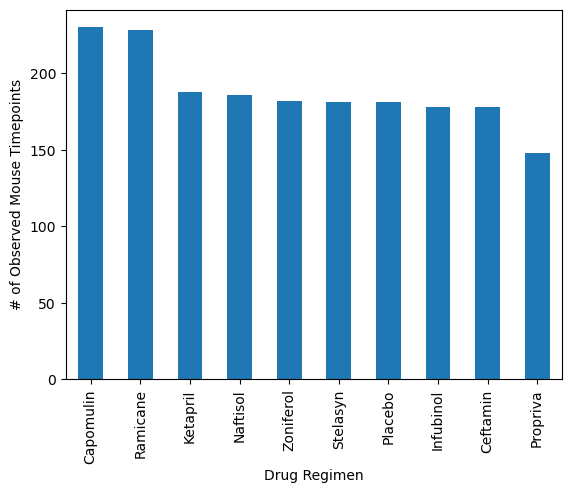

In [690]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
barplt = df_clean['Drug Regimen'].value_counts().plot.bar()
barplt.set_xlabel("Drug Regimen")
barplt.set_ylabel("# of Observed Mouse Timepoints")

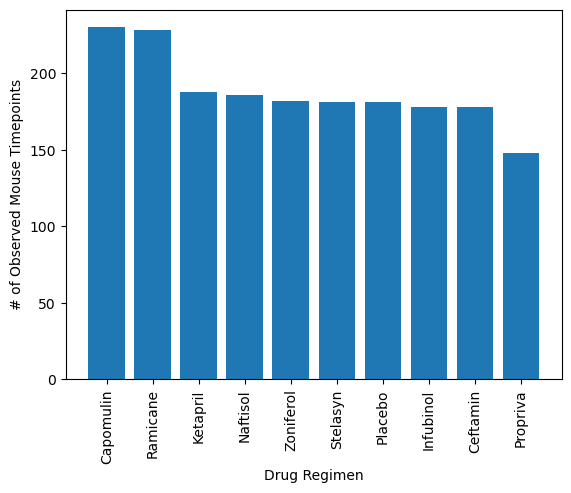

In [691]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis = df_clean["Drug Regimen"].value_counts()
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, y_axis.index.values, rotation=90)
plt.show()

<Axes: ylabel='Count'>

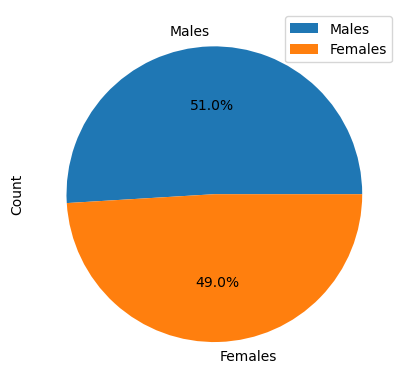

In [692]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_data = df_clean.loc[df_clean["Sex"] == "Female"]
female_count = len(female_data["Mouse ID"])
male_data = df_clean.loc[df_clean["Sex"] == 'Male']
male_count = len(male_data['Mouse ID'])
sex_data = [['Males', int(male_count)], ["Females", int(female_count)]]
sex_df = pd.DataFrame(sex_data, columns=['Sex', 'Count'])
sex_df = sex_df.set_index('Sex')
sex_df.plot(kind='pie', y='Count', autopct='%1.1f%%')

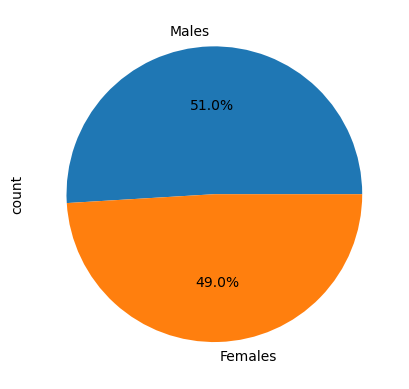

In [693]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_list = [male_count, female_count]
pie_labels = ['Males', 'Females']
plt.ylabel("count")
plt.pie(sex_list, labels=pie_labels, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [694]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = df_clean.groupby(['Mouse ID']).agg(Timepoint=('Timepoint', 'max'))

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_new = last_timepoint.merge(df_clean, how='inner', on=['Mouse ID', 'Timepoint'])

In [695]:
# Put treatments into a list for for loop (and later for plot labels)
four_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
box = dict()
for drug in four_regimens:
    drug_df = last_timepoint_new.loc[last_timepoint_new['Drug Regimen'].isin([drug])]
    drug_volume = drug_df['Tumor Volume (mm3)'].tolist()
    box[drug] = drug_volume

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    quartiles = drug_df.quantile([.25, .5, .75])
    lowerq = quartiles.iloc[0]['Tumor Volume (mm3)']
    upperq = quartiles.iloc[2]['Tumor Volume (mm3)']
    medq = quartiles.iloc[1]['Tumor Volume (mm3)']
    iqr =upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

C:\Users\jhyan\AppData\Local\Temp\ipykernel_8384\1978353687.py:21: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quartiles = drug_df.quantile([.25, .5, .75])


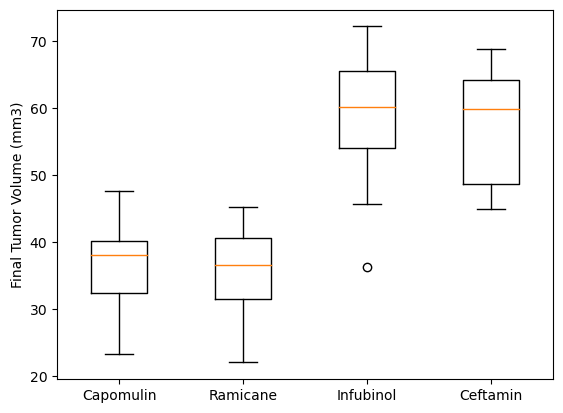

In [696]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(box.values())
ax.set_xticklabels(box.keys())
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

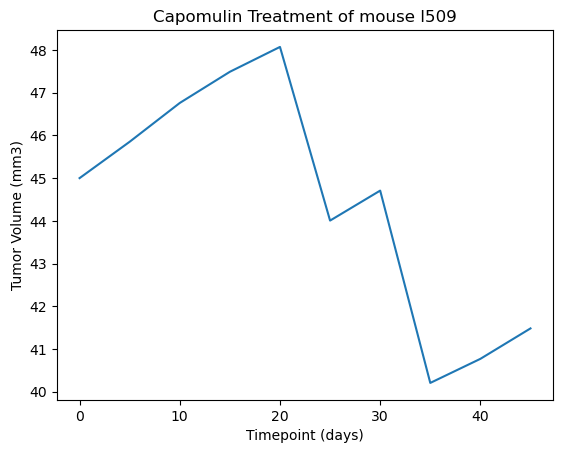

In [697]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capumolin_options = ['Capomulin']
capumolin_df = df_clean.loc[df_clean['Drug Regimen'].isin(capumolin_options)]

mouse_l509_df = df_clean[df_clean['Mouse ID']=='l509']
plt.plot(mouse_l509_df['Timepoint'], mouse_l509_df['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of mouse l509")
plt.show()

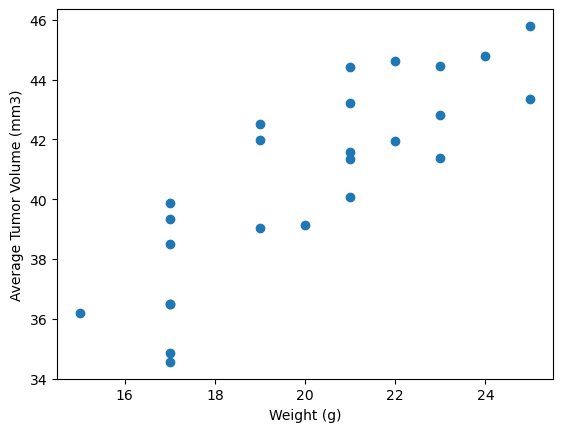

In [698]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_drug_df = df_clean[df_clean["Drug Regimen"].isin(['Capomulin'])].reset_index(drop=True)
capomulin_df_avg=capomulin_drug_df.groupby(["Mouse ID", "Weight (g)"]).agg(avg_tumor_size = ('Tumor Volume (mm3)', 'mean')).reset_index()

plt.scatter(capomulin_df_avg["Weight (g)"], capomulin_df_avg['avg_tumor_size'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

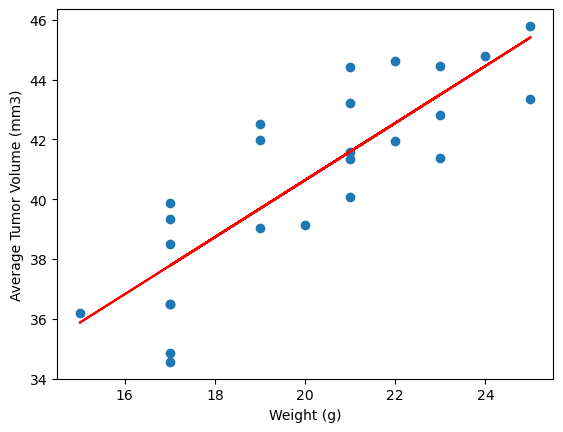

In [699]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_df_avg['Weight (g)'], capomulin_df_avg['avg_tumor_size'])
regress_values = (capomulin_df_avg['Weight (g)'] * slope + intercept)
plt.plot(capomulin_df_avg['Weight (g)'], regress_values, "r-")
plt.scatter(capomulin_df_avg['Weight (g)'], capomulin_df_avg['avg_tumor_size'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()